# Choose among many Regression models
 A follow along project on drug discovery for *Zaire ebolavirus*

by Rea Kalampaliki

**Digital mentor**: Chanin Nantasenamat ([Data Professor](https://www.youtube.com/watch?v=qWVTxfLq2ak&list=PLtqF5YXg7GLlQJUv9XJ3RWdd5VYGwBHrP&index=2))

In [ ]:
! pip install lazypredict

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

##Load GAR transformylase dataset

In [ ]:
df = pd.read_csv("/content/GAR_transformylase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv")

print(df.shape)
df.head()

(69, 882)


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.32
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.74
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.37
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.20
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.70


The ***GAR transformylase*** dataset contains:
- 881 features (PubChem fingerprint descriptors) 
- 1 target variable (pIC50 values)

##X-Y split

In [ ]:
X = df.drop("pIC50", axis=1)
Y = df["pIC50"]

print("GAR Transfomylase Dataset")
print("X - ", list(X.columns))
print("Y - ", Y.name)

GAR Transfomylase Dataset
X -  ['PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3', 'PubchemFP4', 'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8', 'PubchemFP9', 'PubchemFP10', 'PubchemFP11', 'PubchemFP12', 'PubchemFP13', 'PubchemFP14', 'PubchemFP15', 'PubchemFP16', 'PubchemFP17', 'PubchemFP18', 'PubchemFP19', 'PubchemFP20', 'PubchemFP21', 'PubchemFP22', 'PubchemFP23', 'PubchemFP24', 'PubchemFP25', 'PubchemFP26', 'PubchemFP27', 'PubchemFP28', 'PubchemFP29', 'PubchemFP30', 'PubchemFP31', 'PubchemFP32', 'PubchemFP33', 'PubchemFP34', 'PubchemFP35', 'PubchemFP36', 'PubchemFP37', 'PubchemFP38', 'PubchemFP39', 'PubchemFP40', 'PubchemFP41', 'PubchemFP42', 'PubchemFP43', 'PubchemFP44', 'PubchemFP45', 'PubchemFP46', 'PubchemFP47', 'PubchemFP48', 'PubchemFP49', 'PubchemFP50', 'PubchemFP51', 'PubchemFP52', 'PubchemFP53', 'PubchemFP54', 'PubchemFP55', 'PubchemFP56', 'PubchemFP57', 'PubchemFP58', 'PubchemFP59', 'PubchemFP60', 'PubchemFP61', 'PubchemFP62', 'PubchemFP63', 'PubchemFP64', 'Pu

## Feature selection

Apply the **Low variance threshold** method

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=(.8 * (1 - .8))):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [ ]:
X_selected = variance_threshold_selector(X)

X_selected.shape

(69, 75)

## Test-train split

80/20 ratio

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2)

Y_train.reset_index(inplace=True, drop=True)
Y_test.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

print("Size of the original dataset:\n", X_selected.shape, Y.shape)
print("Size of the train dataset:\n", X_train.shape, Y_train.shape)
print("Size of the test dataset:\n", X_test.shape, Y_test.shape)

Size of the original dataset:
 (69, 75) (69,)
Size of the train dataset:
 (55, 75) (55,)
Size of the test dataset:
 (14, 75) (14,)


##Compare ML algorithms

Define LazyRegressor

In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 39/39 [00:05<00:00,  7.35it/s]

[18:13:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Show the performance table.

In [ ]:
models

,R-Squared,RMSE,Time Taken
Model,,,
SVR,0.79,0.77,0.03
NuSVR,0.74,0.87,0.01
OrthogonalMatchingPursuit,0.67,0.97,0.02
LinearSVR,0.57,1.11,0.03
OrthogonalMatchingPursuitCV,0.53,1.17,0.02
RidgeCV,0.52,1.18,0.03
LGBMRegressor,0.51,1.19,0.03
HistGradientBoostingRegressor,0.51,1.19,0.09
SGDRegressor,0.49,1.22,0.03


## Visualize models' performance

[(0.0, 1.0)]

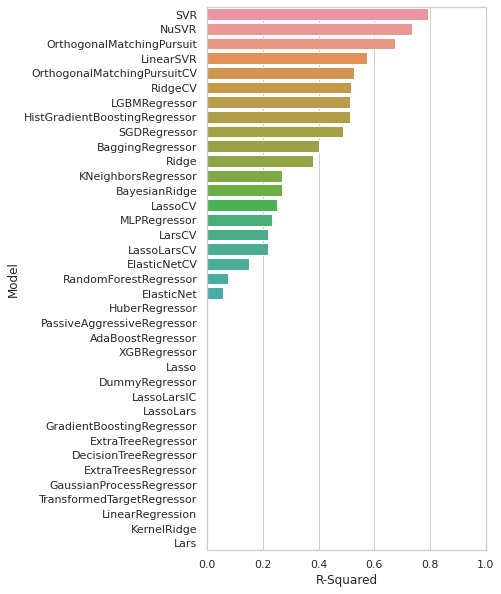

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="R-Squared", data=models)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

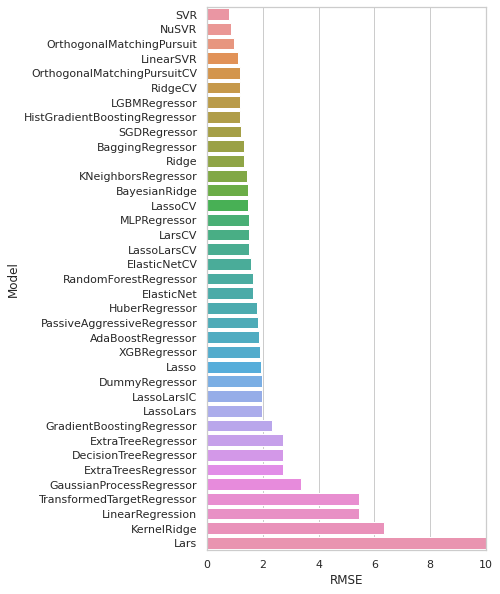

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="RMSE", data=models)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

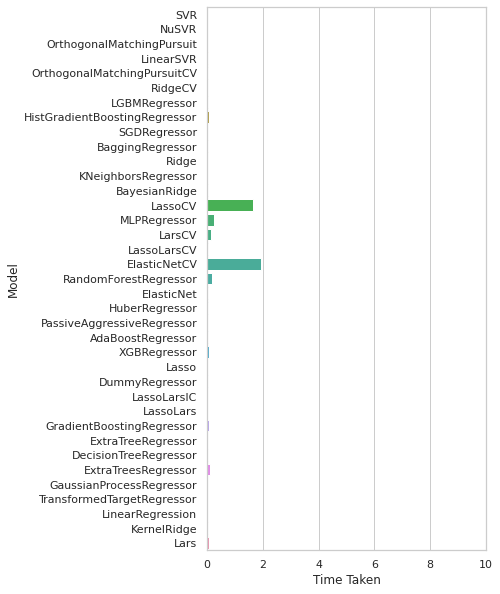

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="Time Taken", data=models)
ax.set(xlim=(0, 10))